# 📊 Branchen-Cluster-Analyse – Erweiterte Auswertung

Dieses Notebook ergänzt das Streamlit-Dashboard durch weiterführende Analysen der Cluster-Ergebnisse.

## 1️⃣ Datenvorbereitung

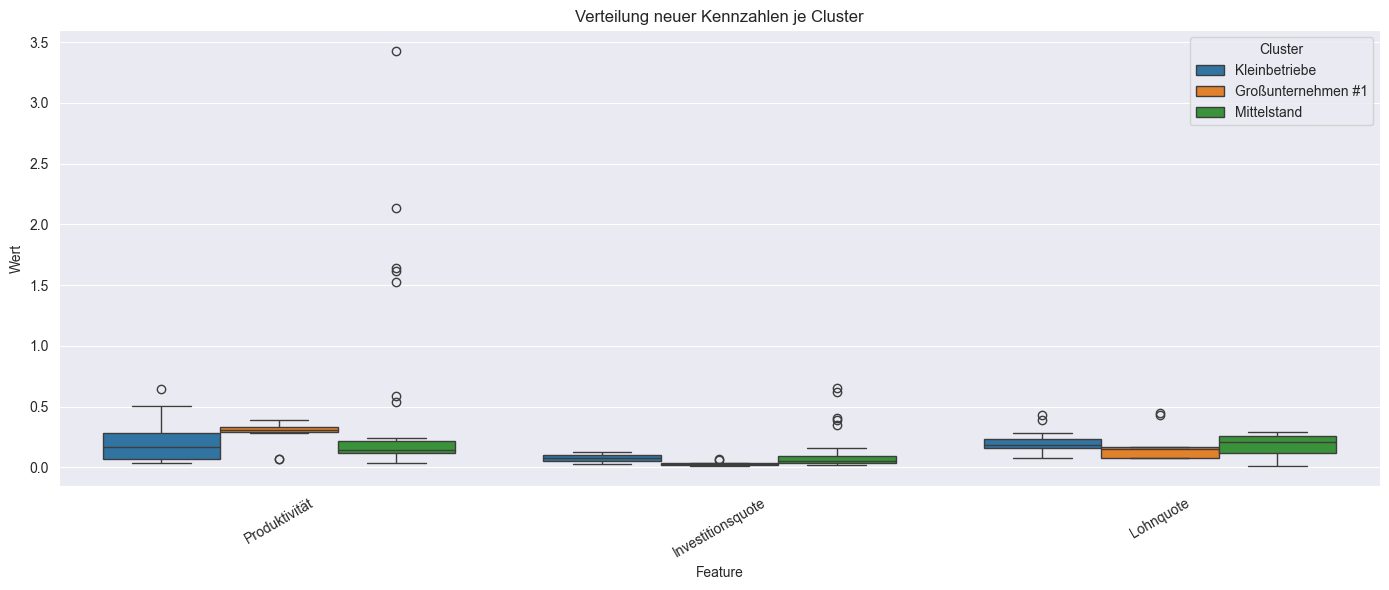

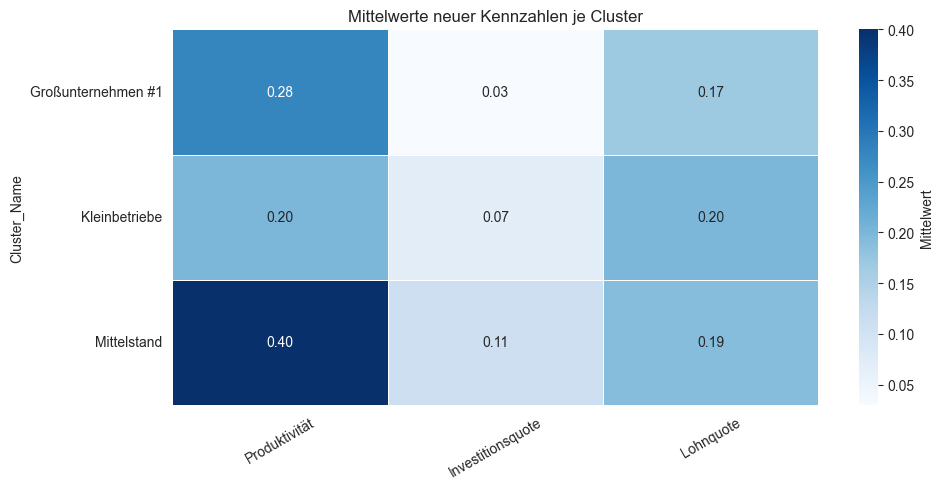

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Funktion zur Berechnung abgeleiteter Kennzahlen
def add_derived_features(df):
    df = df.copy()
    df["Produktivität"] = df["Umsatz"] / df["Tätige Personen"].replace(0, np.nan)
    df["Investitionsquote"] = df["Bruttoinvestitionen in Sachanlagen"] / df["Umsatz"].replace(0, np.nan)
    df["Lohnquote"] = df["Bruttolöhne und -gehälter"] / df["Umsatz"].replace(0, np.nan)
    return df

# CSV einlesen
df = pd.read_csv("data/cluster/cluster_ergebnisse_mehrere_jahre.csv", sep=";")

# Neue Merkmale hinzufügen
df_extended = add_derived_features(df)


# Boxplot: Verteilung pro Cluster
new_features = ["Produktivität", "Investitionsquote", "Lohnquote"]
melted = df_extended[["Cluster_Name"] + new_features].melt(
    id_vars="Cluster_Name", var_name="Feature", value_name="Wert"
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x="Feature", y="Wert", hue="Cluster_Name")
plt.title("Verteilung neuer Kennzahlen je Cluster")
plt.xticks(rotation=30)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Heatmap: Durchschnittswerte pro Cluster

cluster_means = df_extended.groupby("Cluster_Name")[new_features].mean().round(2)

plt.figure(figsize=(10, 5))
sns.heatmap(
    cluster_means,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"label": "Mittelwert"}
)
plt.title("Mittelwerte neuer Kennzahlen je Cluster")
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 2️⃣ Clustercharakterisierung

- Mittelwerte je Cluster
- Heatmap
- Boxplots

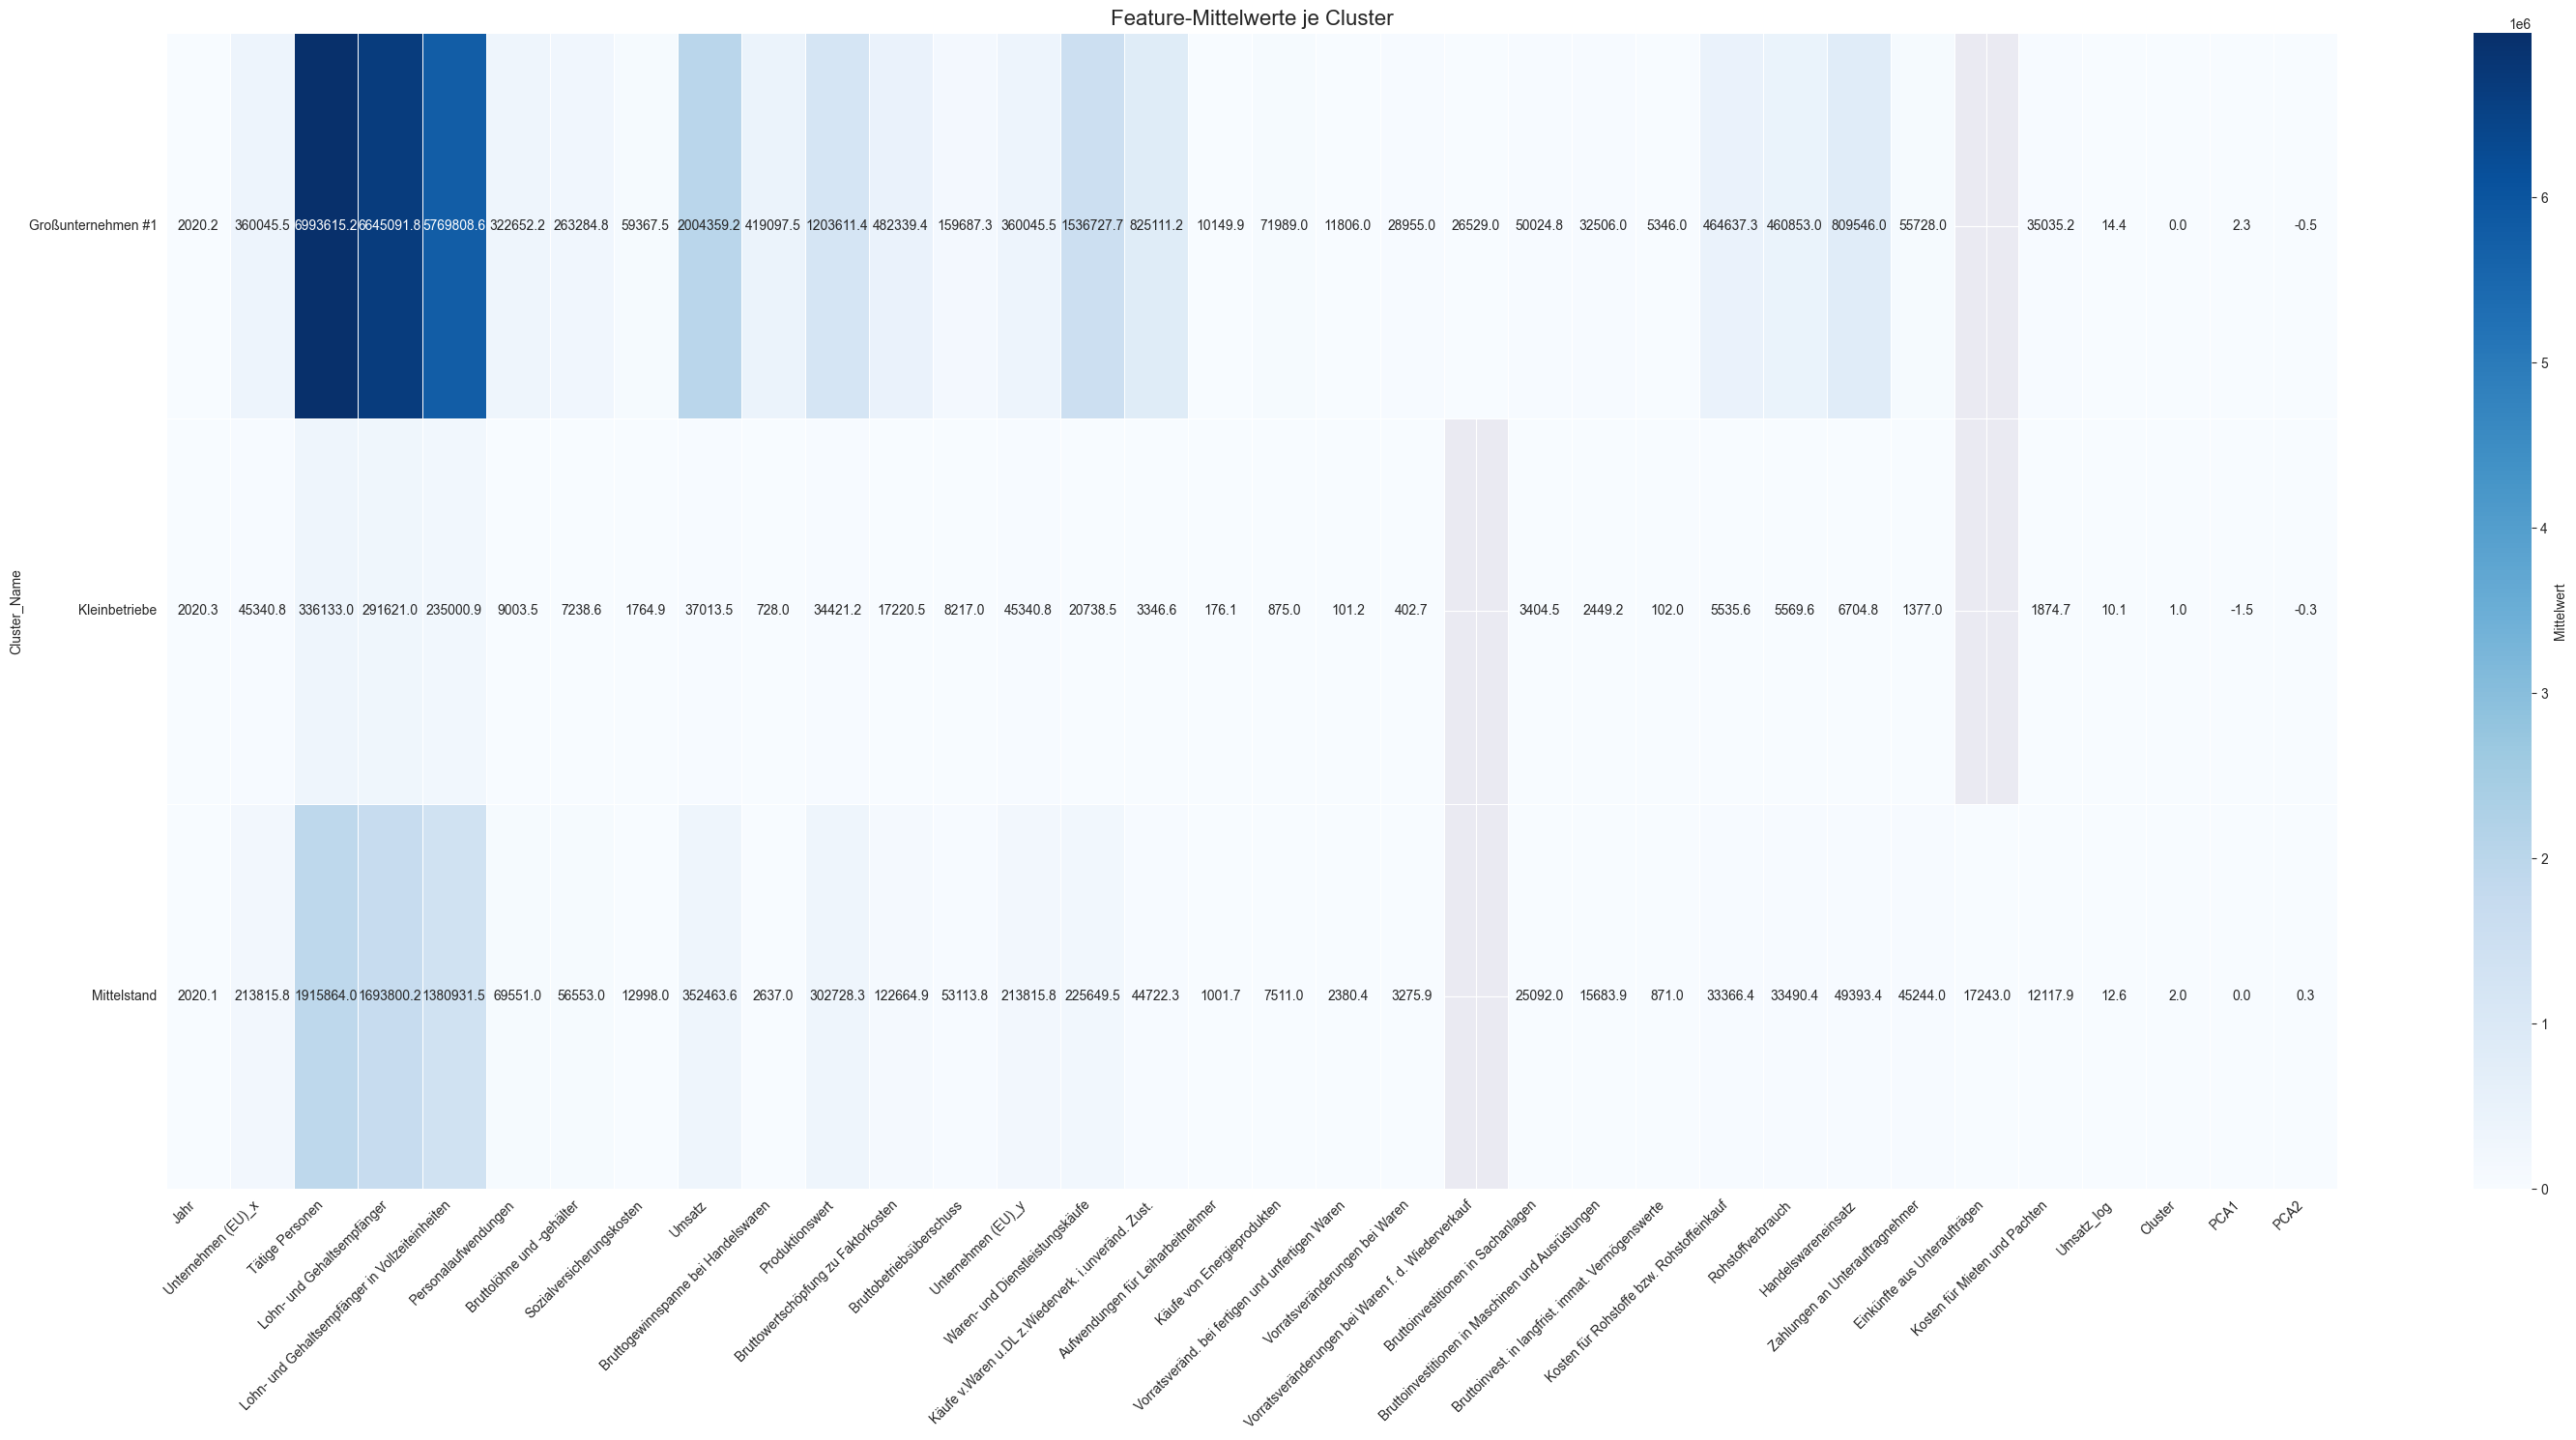

In [6]:
# Mittelwerte berechnen
cluster_means = df.groupby('Cluster_Name').mean(numeric_only=True)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotgröße erhöhen
plt.figure(figsize=(30, 15))

# Heatmap erzeugen
sns.heatmap(cluster_means,
            annot=True,
            fmt=".1f",          # Formatierung: eine Nachkommastelle
            cmap="Blues",
            linewidths=0.5,     # leichte Trennlinien
            cbar_kws={"label": "Mittelwert"})


plt.title("Feature-Mittelwerte je Cluster", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

plt.show()

## 3️⃣ Zeitliche Entwicklung

- Entwicklung eines Merkmals je Jahr und Cluster
- Linienplot

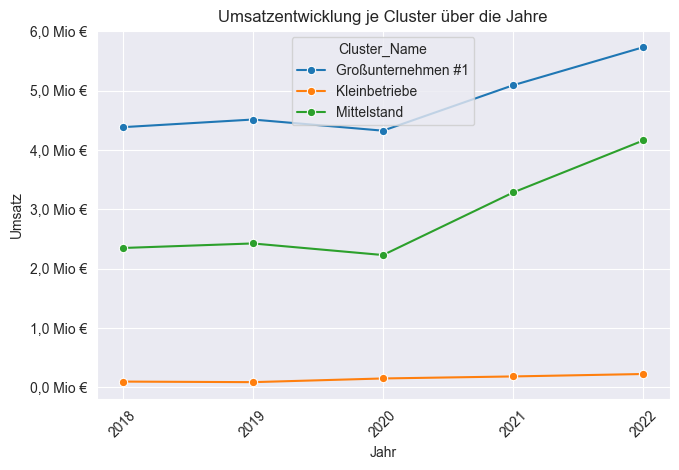

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Beispiel: Umsatzentwicklung
df["Jahr"] = df["Jahr"].astype(str)
umsatz_trend = df.groupby(["Jahr", "Cluster_Name"])["Umsatz"].sum().reset_index()

# Plot
sns.lineplot(data=umsatz_trend, x="Jahr", y="Umsatz", hue="Cluster_Name", marker="o")
plt.title("Umsatzentwicklung je Cluster über die Jahre")
plt.xticks(rotation=45)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.') + ' Mio €'))

plt.show()


## 4️⃣ (Optional) Feature-Wichtigkeit

- RandomForest zur Vorhersage von Clustern
- Feature Importance Plot

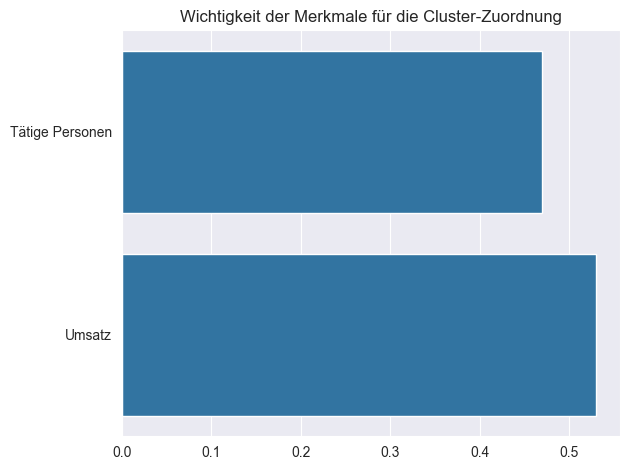

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Features vorbereiten
features = ['Tätige Personen', 'Umsatz']  # ggf. anpassen
X = df[features].dropna()
y = LabelEncoder().fit_transform(df.loc[X.index, 'Cluster_Name'])

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

sns.barplot(x=rf.feature_importances_, y=features)
plt.title('Wichtigkeit der Merkmale für die Cluster-Zuordnung')
plt.tight_layout()
plt.show()

## 5️⃣ Fazit

- Was sagen die Cluster über die Branche aus?
- Gibt es auffällige Entwicklungen?
- Welche Merkmale dominieren?
